In [244]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-data-set/diabetes.csv


In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

#Veri seti ile ilgili işlemler yapabilmemiz için veri setinin dahil edilmesi gerekmektedir.
df = pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')

df.sample(10)





,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
185,7,194,68,28,0,35.9,0.745,41,1
752,3,108,62,24,0,26.0,0.223,25,0
662,8,167,106,46,231,37.6,0.165,43,1
104,2,85,65,0,0,39.6,0.930,27,0
455,14,175,62,30,0,33.6,0.212,38,1
260,3,191,68,15,130,30.9,0.299,34,0
450,1,82,64,13,95,21.2,0.415,23,0
688,1,140,74,26,180,24.1,0.828,23,0
737,8,65,72,23,0,32.0,0.600,42,0
395,2,127,58,24,275,27.7,1.600,25,0


In [272]:
#Veri setinin ilk 5 satırının ekrana basılmasını sağlar.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [273]:
#Veri setinin hızlıca özetini oluşturmaktadır.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [274]:
#Veri setinin son 5 satırının görüntülenmesini sağlamaktadır.
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [275]:
#Veri setinin her sütunundaki eksik değerlerin hesaplanmasını sağlamaktadır.sum() metodu ile kullanılarak eksik olan toplam veri sayısına ulaşmamızı sağlar.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [276]:
#Veri setindeki tekrar eden verilerin tespit edilmesini sağlamaktadır.
df.duplicated()
#Bu komutla birlikte tekrar eden verileri engellemek için kullanılmaktadır.
df=df.drop_duplicates()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


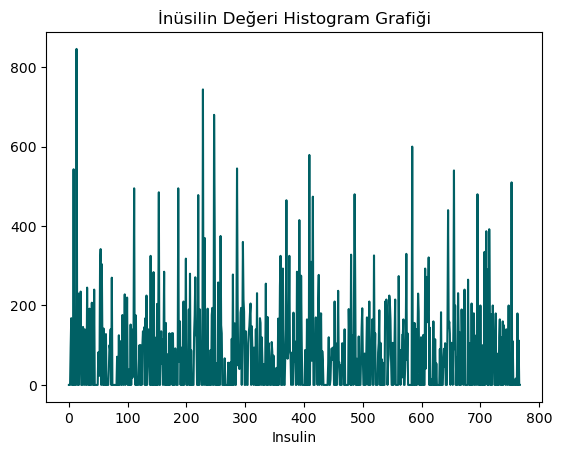

In [277]:
#Belirlenen bir özelliğin histogram grafiğinin oluşturulması için kullanılmaktadır.<color>,<linestyle> vb parametreler ile görsel açıdan değişiklikler yapılmasına izin vermektedir.
plt.plot(df.Insulin, color="#006064",linestyle="solid")
plt.xlabel("Insulin")
plt.title("İnüsilin Değeri Histogram Grafiği")
#Grafiklerin ve figürlerin gösterilmesi amacıyla kullanılır.
plt.show()
plt.close()

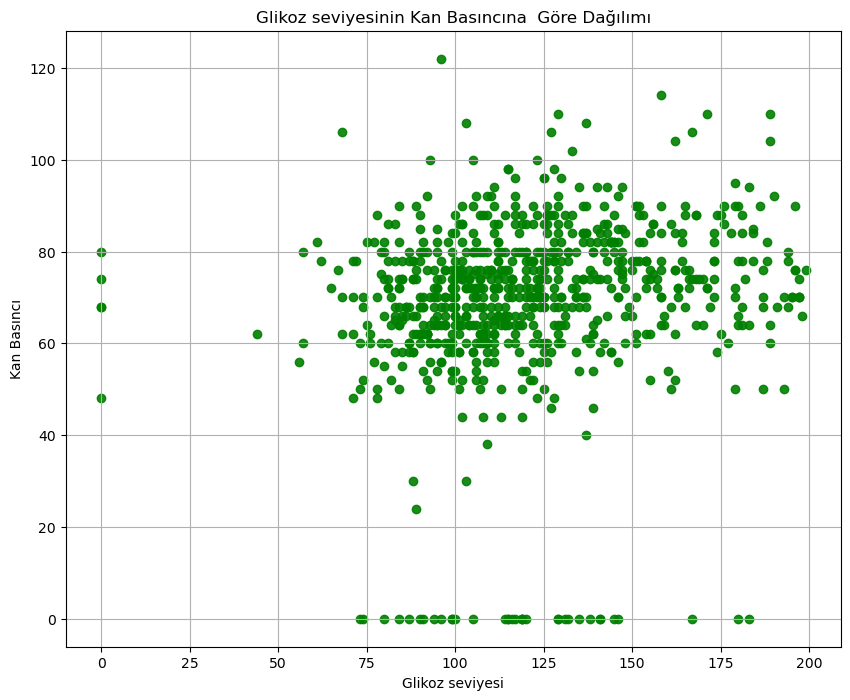

In [278]:
#Öncelikle scatter plot grafiğinde kullanılacak olan değişkenler belirlenir.Scatter plot grafikleri iki veya daha fazla değişken arasındaki ilişkiyi belirmek için kullanılmaktadır.
glucoseData = df['Glucose']
bloodpressureData = df['BloodPressure']

#Oluşturulacak olan figürün boyutu belirlenir.
plt.figure(figsize=(10, 8))

#Bu kod satırı ile gerekli grafik oluşturulur.
plt.scatter(glucoseData, bloodpressureData, color='green', alpha=0.9)
plt.xlabel('Glikoz seviyesi')
plt.ylabel('Kan Basıncı')
plt.title('Glikoz seviyesinin Kan Basıncına  Göre Dağılımı')
plt.grid(True)
plt.show()



In [279]:
#Scatter plot grafiği ile incelenmek istenen değişkenler seçilir.
ageData=df["Age"]
insulinData=df["Insulin"]

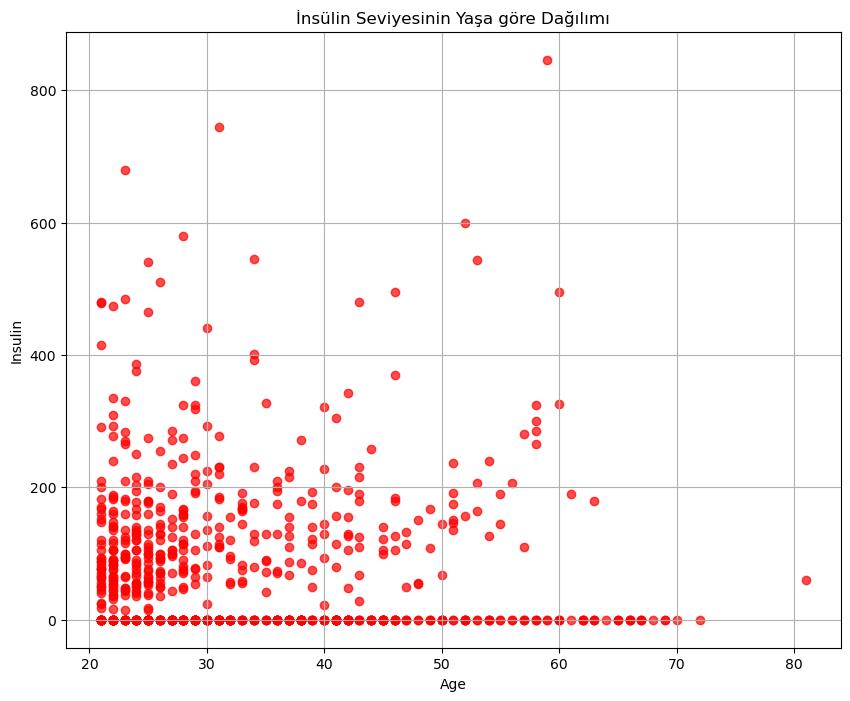

In [280]:
plt.figure(figsize=(10, 8))
plt.scatter(ageData, insulinData, color='red', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Insulin')
plt.title('İnsülin Seviyesinin Yaşa göre Dağılımı')
plt.grid(True)
plt.show()



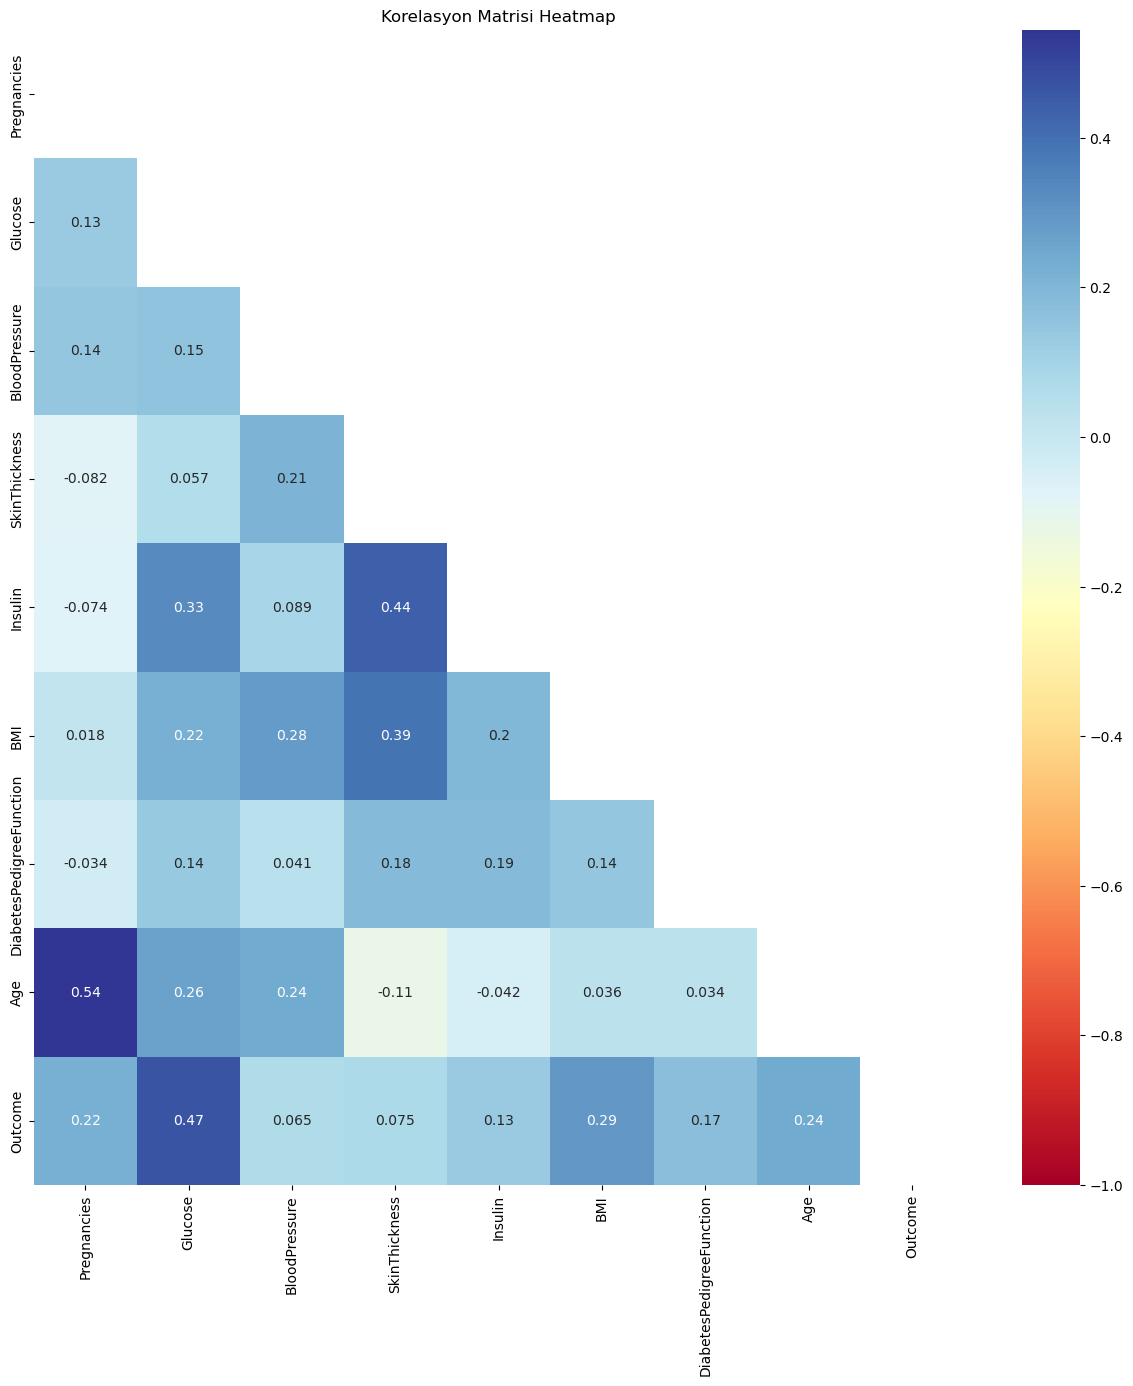

In [281]:
#Burada veri setindeki sayısal değerler arasındaki korelasyon değerleri incelenmiştir.İlk olarak sayısal(numeric) değer sahip olan sütunlar belirlenir.
numeric_data = df.select_dtypes(include='number')

#Bu kod sayesinde veri setinden çekilen sayısal değer içerikli sütunların korelasyon değerleri hesaplanır.
correlation_matrix = numeric_data.corr()

#Korelasyon grafikleri dikdörtgen biçiminde oluşturulmaktadır, alt ve üst üçgenler olmak üzer birbirinin aynısı olan iki üçgenden meydana gelir.Bu kod bloğu sayesinde üst üçgen maskelenerek daha farklı bir görünüm elde edilmektedir.
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(correlation_matrix, vmin=-1, cmap='RdYlBu', annot=True, mask=mask)
plt.title('Korelasyon Matrisi Heatmap')
plt.show()



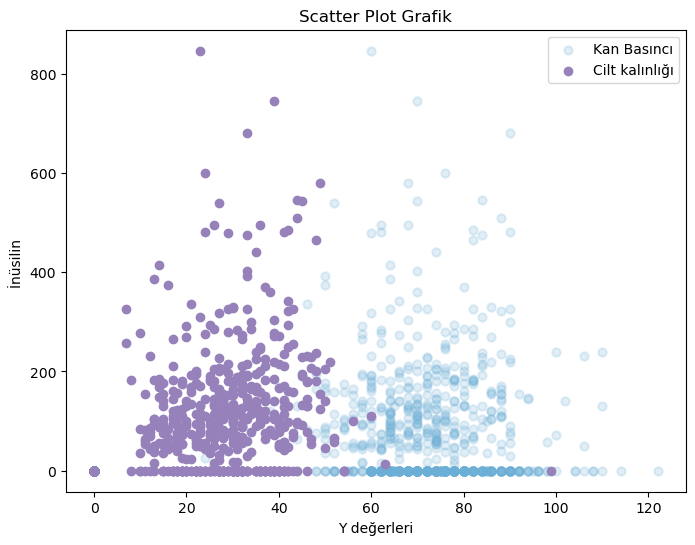

In [282]:
#Scatter ploot grafiklerinde farklı iki veya daha fazla değişken bir arada kullanılabilir.Bu kısımda ilk olarak birlikte karşılaştırılması istenen değerler seçilmiştir.

insulinData=df["Insulin"]
BloodPressureData=df["BloodPressure"]
SkinThicknessData=df["SkinThickness"]

#Figür boyutu belirlenmiş ve daha sonrasında karşıltırma yapmak için değişkenle x ve y eksenine göre yerleştirilmiştir.        
plt.figure(figsize=(8, 6))
plt.scatter(BloodPressureData,insulinData , color='#6baed6',linewidths=1.5,alpha=0.2, label='Kan Basıncı')
plt.scatter( SkinThicknessData,insulinData, color='#9681bb', label='Cilt kalınlığı')


plt.xlabel('Y değerleri')
plt.ylabel('İnüsilin ')
plt.title('Scatter Plot Grafik')
plt.legend()
plt.show()

In [283]:
#Veri setinin sahip olduğu tüm sütunlara ait ortalama,standart sapma değerleri alınarak normalleştirme işlemlerinde sıklıkla tercih edilen Z puanı hesaplanmıştır.
# Z puanı bir veri noktasının, veri setinin ortalaması ve standart sapması dikkate alınarak ne kadar uzak olduğunu ifade eden bir istatistiksel terimdir.
for col in df.columns:
    t = df[col].mean()
    z = df[col].std()
    df[col] = (df[col] - t) / z   
print(df)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639530  0.847771       0.149543       0.906679 -0.692439  0.203880   
1      -0.844335 -1.122665      -0.160441       0.530556 -0.692439 -0.683976   
2       1.233077  1.942458      -0.263769      -1.287373 -0.692439 -1.102537   
3      -0.844335 -0.997558      -0.160441       0.154433  0.123221 -0.493721   
4      -1.141108  0.503727      -1.503707       0.906679  0.765337  1.408828   
..           ...       ...            ...            ...       ...       ...   
763     1.826623 -0.622237       0.356200       1.721613  0.869464  0.115094   
764    -0.547562  0.034575       0.046215       0.405181 -0.692439  0.609757   
765     0.342757  0.003299       0.149543       0.154433  0.279412 -0.734711   
766    -0.844335  0.159683      -0.470426      -1.287373 -0.692439 -0.240048   
767    -0.844335 -0.872451       0.046215       0.655930 -0.692439 -0.201997   

     DiabetesPedigreeFunction       Age

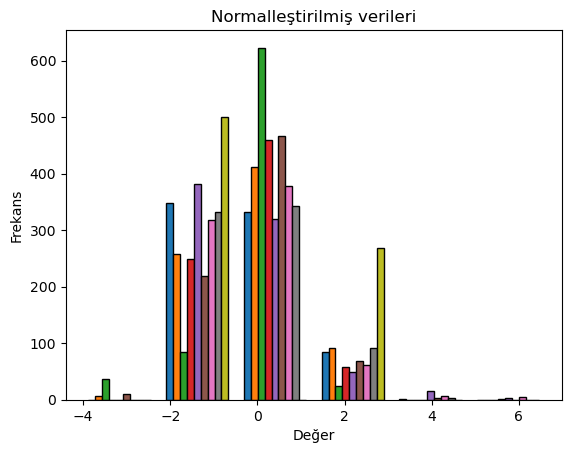

In [284]:
#Z puanı hesaplanan veriler histogram grafiği ile incelenmektedir.
plt.hist(df, bins=6, edgecolor='black')
plt.title('Normalleştirilmiş verileri')
plt.xlabel('Değer')
plt.ylabel('Frekans')
plt.show()

In [285]:
df.info

<bound method DataFrame.info of      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639530  0.847771       0.149543       0.906679 -0.692439  0.203880   
1      -0.844335 -1.122665      -0.160441       0.530556 -0.692439 -0.683976   
2       1.233077  1.942458      -0.263769      -1.287373 -0.692439 -1.102537   
3      -0.844335 -0.997558      -0.160441       0.154433  0.123221 -0.493721   
4      -1.141108  0.503727      -1.503707       0.906679  0.765337  1.408828   
..           ...       ...            ...            ...       ...       ...   
763     1.826623 -0.622237       0.356200       1.721613  0.869464  0.115094   
764    -0.547562  0.034575       0.046215       0.405181 -0.692439  0.609757   
765     0.342757  0.003299       0.149543       0.154433  0.279412 -0.734711   
766    -0.844335  0.159683      -0.470426      -1.287373 -0.692439 -0.240048   
767    -0.844335 -0.872451       0.046215       0.655930 -0.692439 -0.201997   

     Di

In [ ]:
#İlk olarak özellikler ve hedef değişkeni ayırılır.
#Modelin eğitilmesi için eğitim ve hedef kümeleri oluşturulur.
#Eğitilen model için kullanılacak yöntem seçilir.Burada tercih edilen Logistik regresyon modeli, bir bağımlı değişkenin (sonuç) iki veya daha fazla kategorik değeri (sınıf) arasındaki ilişkiyi anlamak ve tahmin etmek için kullanılan bir istatistiksel yöntemdir. 
#X_train değişkeni, eğitim setinin özelliklerini içerir ve y_train değişkeni, eğitim setinin etiketlerini içerir. Model, fit() işlevi kullanılarak eğitilir.


In [327]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.5, random_state=42, shuffle=False)


logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))



Logistic Regression Accuracy: 0.7922077922077922
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.68      0.52      0.59        44

    accuracy                           0.79       154
   macro avg       0.75      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


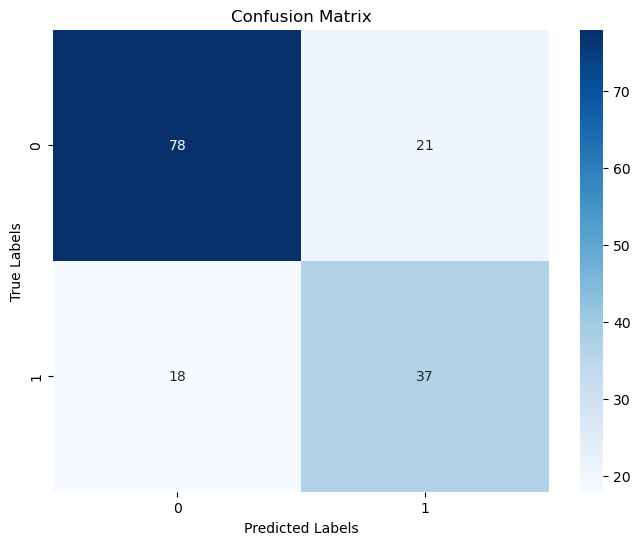

In [328]:
# Features (Özellikler) ve Target (Hedef) olarak ayrıştır
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Eğitim ve test verilerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.5, random_state=42, shuffle=False)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

#Confusion Matrisin görselleştirilmesi için kullanılır.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [294]:
Xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.20,stratify=y)
print(Xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(614, 8)
(154, 8)
(614,)
(154,)


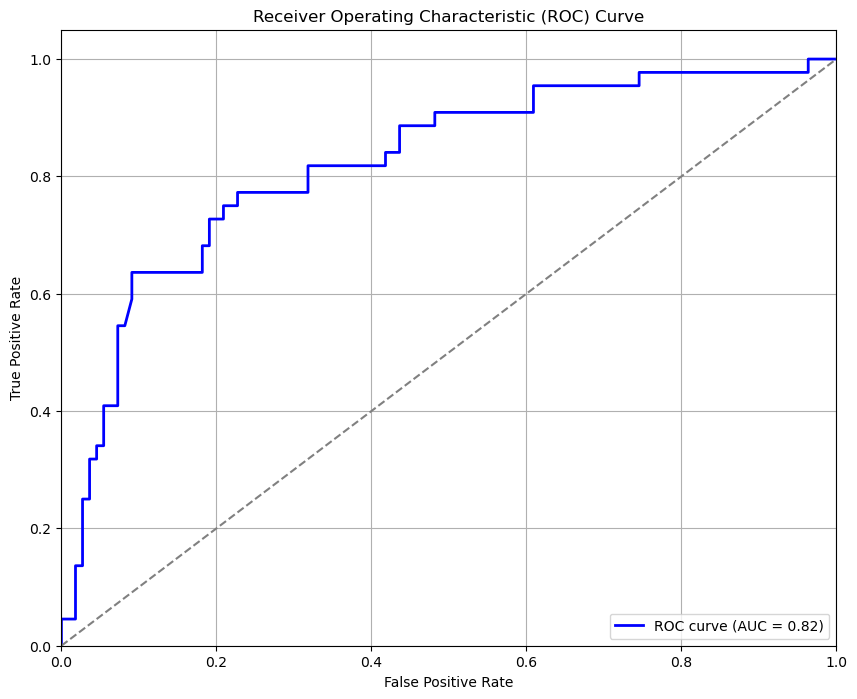

In [329]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.5, random_state=42, shuffle=False)


model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()






In [330]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.5, random_state=42, shuffle=False)

rf_model = RandomForestClassifier(random_state=42, n_estimators=1) 
rf_model.fit(X_train, y_train) 
rf_predictions = rf_model.predict(X_test) 
rf_accuracy = accuracy_score(y_test, rf_predictions) 
print("Random Forest Accuracy:", rf_accuracy) 
print("Random Forest Classification Report:") 
print(classification_report(y_test, rf_predictions)) 
 


Random Forest Accuracy: 0.7012987012987013
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       110
           1       0.48      0.61      0.54        44

    accuracy                           0.70       154
   macro avg       0.65      0.68      0.66       154
weighted avg       0.73      0.70      0.71       154



/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


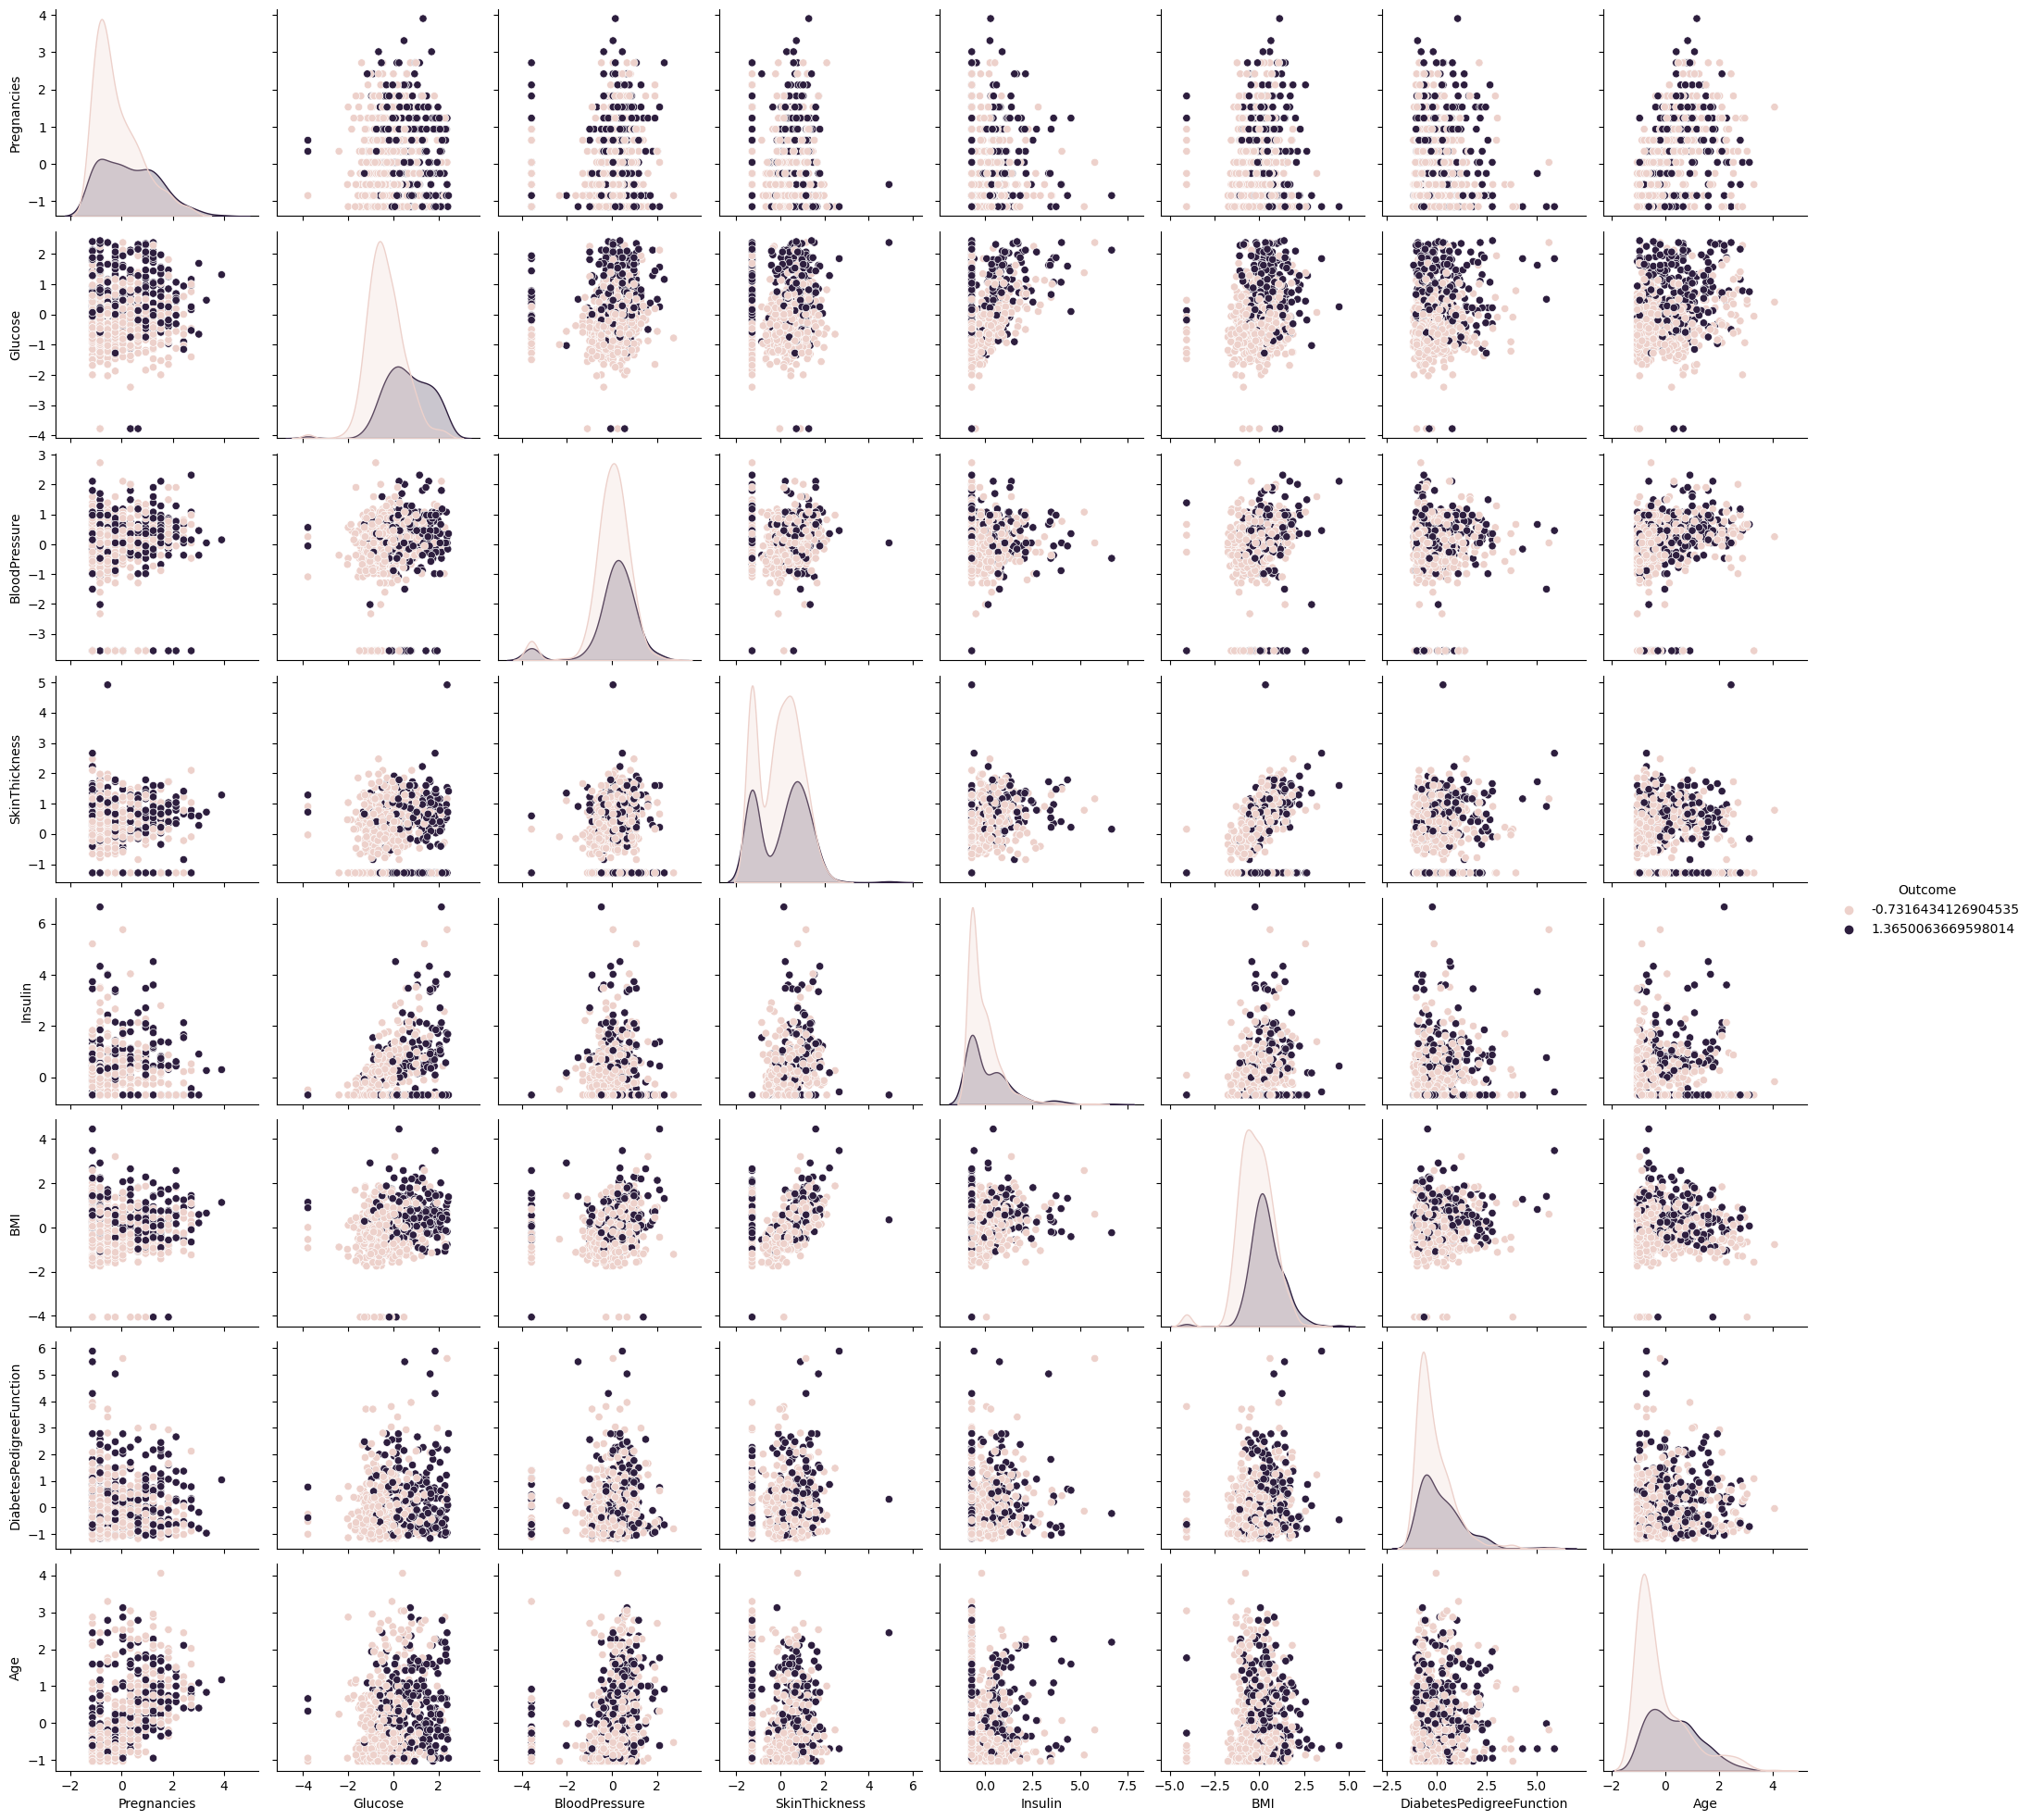

In [270]:
#Seaborn Kütüphanesi ile veri setinde bulunan tüm sayısal değişkenler arasındaki ilişkileri görselleştirir.
sns.pairplot(df,hue='Outcome')




In [331]:
#Decision Tree(karar ağacı)
from sklearn.tree import DecisionTreeClassifier
decisionTreeObject = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
decisionTreeObject.fit(X_train,y_train)
dt_test_sonuc = decisionTreeObject.score(X_test, y_test)
print("Karar Ağacı Doğruluk (test_seti): ",round(dt_test_sonuc,2))


Karar Ağacı Doğruluk (test_seti):  0.73


In [332]:
from sklearn.ensemble import BaggingClassifier
baggingObject = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=20,max_samples=0, max_features=1.0,random_state=20)
bagging_object.fit(X_train, y_train)
bagging_object.fit(X_train, y_train)
bagging_object_sonuc = bagging_object.score(X_test, y_test)
print("Bagging Doğruluk (test_seti): ", round(bagging_object_sonuc,2))

Bagging Doğruluk (test_seti):  0.82


In [334]:
from tensorflow.keras import models, layers
input_dim = X_train.shape[1]
output_dim = 1

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(output_dim, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/80
12/12 [==============================] - 1s 16ms/step - loss: 2.0666 - accuracy: 0.5964 - val_loss: 1.1942 - val_accuracy: 0.6234
Epoch 2/80
12/12 [==============================] - 0s 4ms/step - loss: 0.9607 - accuracy: 0.6224 - val_loss: 0.7900 - val_accuracy: 0.6234
Epoch 3/80
12/12 [==============================] - 0s 4ms/step - loss: 0.7745 - accuracy: 0.6354 - val_loss: 0.6348 - val_accuracy: 0.7208
Epoch 4/80
12/12 [==============================] - 0s 4ms/step - loss: 0.7283 - accuracy: 0.6406 - val_loss: 0.7796 - val_accuracy: 0.5584
Epoch 5/80
12/12 [==============================] - 0s 4ms/step - loss: 0.6513 - accuracy: 0.6536 - val_loss: 0.5945 - val_accuracy: 0.7532
Epoch 6/80
12/12 [==============================] - 0s 5ms/step - loss: 0.6711 - accuracy: 0.6719 - val_loss: 0.5587 - val_accuracy: 0.7338
Epoch 7/80
12/12 [==============================] - 0s 4ms/step - loss: 0.6601 - accuracy: 0.6615 - val_loss: 0.5572 - val_accuracy: 0.7403
Epoch 8/80
12/12 [=